In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns 
color = sns.color_palette()

import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('E:/ML-Lab/ml project/regression/dataset/house_price_regression_dataset.csv')

data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [4]:
data.shape

(1000, 8)

In [5]:
data.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [6]:
data.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')

In [7]:
data = data.drop(columns=['Neighborhood_Quality'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Square_Footage  1000 non-null   int64  
 1   Num_Bedrooms    1000 non-null   int64  
 2   Num_Bathrooms   1000 non-null   int64  
 3   Year_Built      1000 non-null   int64  
 4   Lot_Size        1000 non-null   float64
 5   Garage_Size     1000 non-null   int64  
 6   House_Price     1000 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 54.8 KB


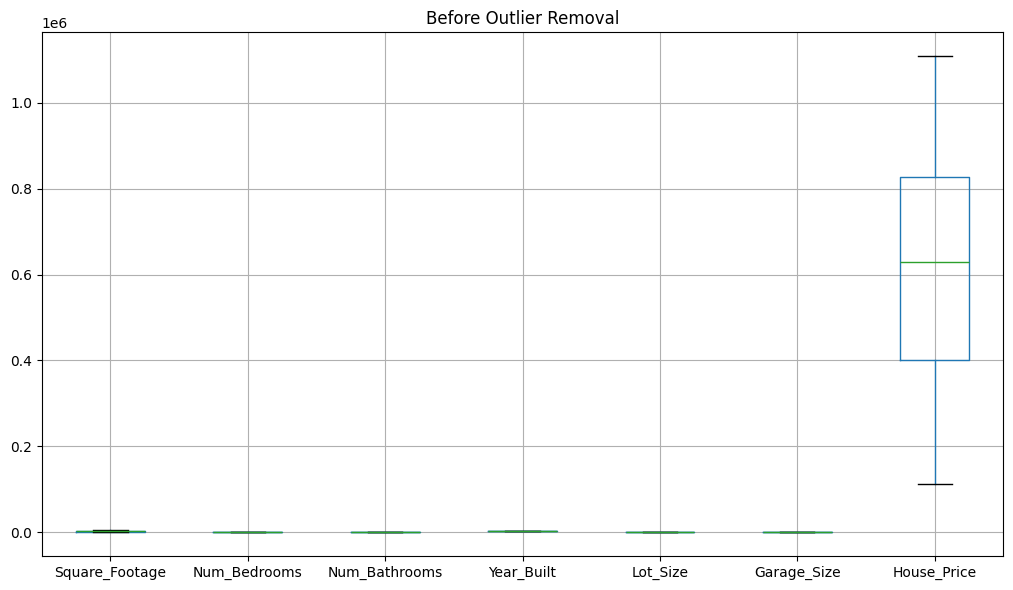

In [8]:

numeric_cols = data.select_dtypes(include=[np.number])

Q1 = numeric_cols.quantile(0.49)
Q3 = numeric_cols.quantile(0.51)
IQR = Q3 - Q1

data_cleaned = data[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
numeric_cols.boxplot()
plt.title("Before Outlier Removal")
plt.tight_layout()
plt.show()

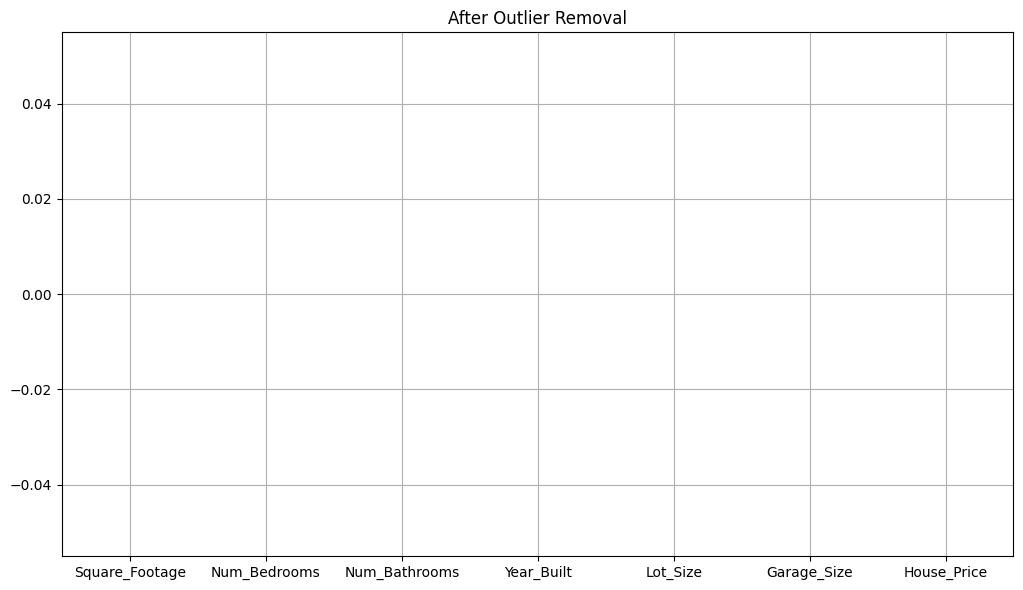

In [9]:
plt.figure(figsize=(20, 6))


plt.subplot(1, 2, 2)
data_cleaned.select_dtypes(include=[np.number]).boxplot()
plt.title("After Outlier Removal")

plt.tight_layout()
plt.show()


In [10]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])


scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_cols)


scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols.columns)


data = pd.concat([scaled_numeric_df, non_numeric_cols.reset_index(drop=True)], axis=1)


print(data.shape)
print()
print('*' * 60)
data.head()

(1000, 7)

************************************************************


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,House_Price
0,-1.159803,-0.693836,-1.186699,-0.269122,-1.679278,-1.254658,-1.406552
1,1.160724,0.007008,1.252559,1.428045,1.522390,-0.027008,1.445699
2,0.618843,-1.394681,0.032930,1.428045,0.660422,-1.254658,0.627824
3,-1.473776,-1.394681,0.032930,-0.463084,-0.036555,-0.027008,-1.535512
4,1.681887,-0.693836,-1.186699,0.312764,1.480809,-1.254658,1.668552


In [11]:
from sklearn.model_selection import train_test_split
X = data.drop('House_Price', axis=1)
y = data['House_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 6), (300, 6), (700,), (300,))

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [23]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.0015890247466310908
Root Mean Squared Error: 0.03986257325651583
R-squared: 0.9984013202682451


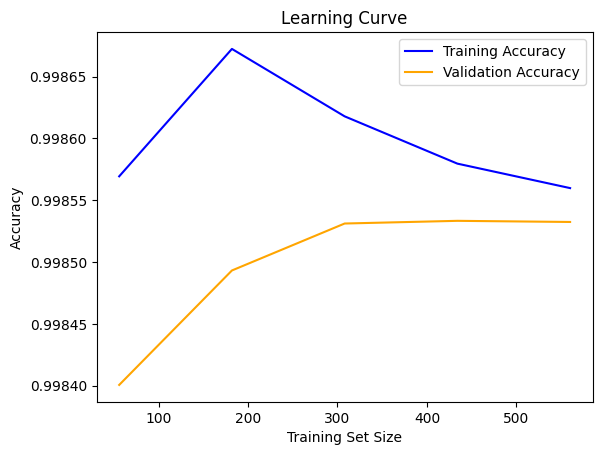

In [24]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='orange')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()


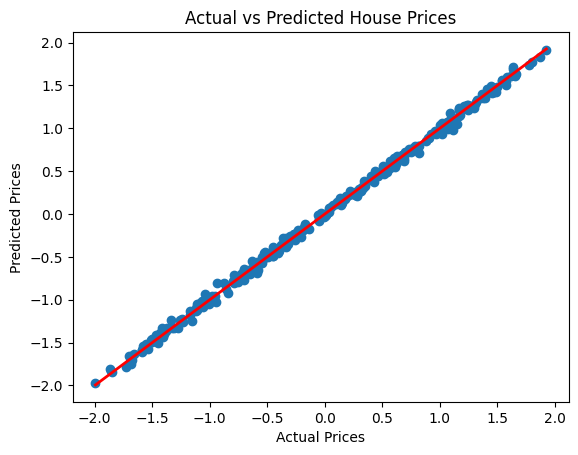

In [25]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

In [26]:
from joblib import dump, load
dump(model, 'regression_model.joblib')
print("Model saved successfully.")

Model saved successfully.


In [27]:
loaded_model = load('regression_model.joblib')
input_data = [[1360, 2, 1, 1981, 0.599637, 2]]


prediction = loaded_model.predict(input_data)


print(f"Prediction: {prediction[0]}")



Prediction: 1504.2519477318133


C:\Users\bilal\anaconda3\envs\ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
